# Part A



In [3]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [4]:
df = pd.read_csv(r'CE802_P2_Data.csv')
df.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-0.123210,2577.32,2183.52,7747.32,2.16,9693.21,-2.2498,-1381.98,3033.55,53.796,-90073.683,2.2986,6.7860,1,-3.9290,-0.8095,3.5800,-5.9384,-9.3420,1,NaN,True
1,-2.064600,1200.12,1654.74,6027.72,2.16,9391.26,-2.7420,-1336.20,2081.35,33.514,-90039.942,0.9676,5.5240,0,-1.6609,-2.3020,3.8880,-6.5640,-6.3806,1,NaN,False
2,-0.083748,2769.35,2661.42,7798.66,2.16,9296.28,-3.2130,-1531.16,3397.15,39.430,-90138.300,1.7296,10.0870,0,-2.5100,-2.8190,2.1606,-5.2340,-9.6780,0,NaN,False
3,-2.808300,3161.52,2199.12,8369.32,5.16,7990.71,-2.2703,-1397.03,3289.99,42.012,-90993.330,3.5320,15.5400,1,-2.2555,-0.9770,8.2160,-5.8166,-6.1512,0,42.06,True
4,-0.445800,2707.42,2083.62,9054.72,5.16,8691.81,-3.7310,-804.04,1903.35,43.172,-90092.340,0.5662,4.5188,0,-1.7843,-1.3690,0.7562,-6.4060,-9.5320,0,NaN,True


In [5]:
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [6]:
data = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   int64  
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   int64  
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

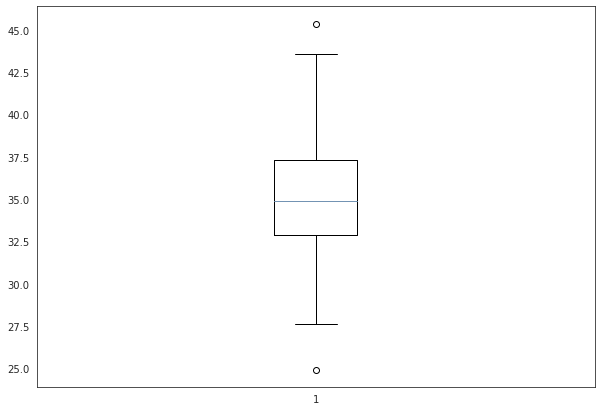

In [32]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data.F21)
 
# show plot
plt.show()

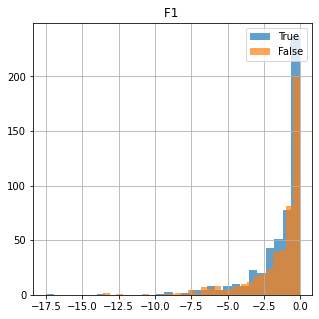

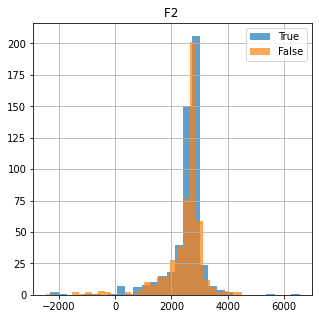

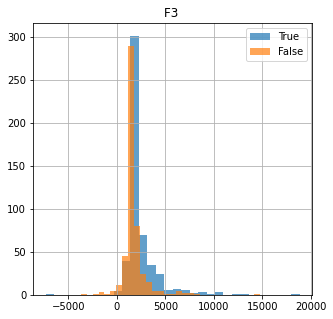

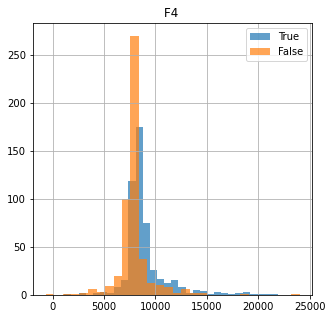

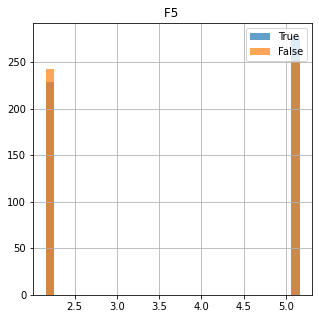

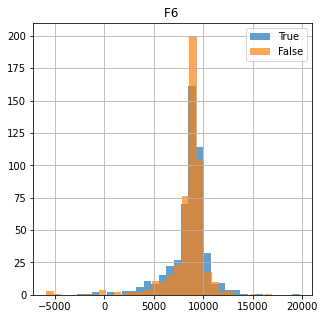

In [7]:
pos = df[df['Class'] == 1]['F1']
neg = df[df['Class'] == 0]['F1']

fig = plt.figure(figsize = (5,5))
plt.title("F1 ")
pos.hist(alpha=0.7,bins=30,label="True")
neg.hist(alpha=0.7,bins=30,label="False")
plt.legend(loc = "upper right")


pos = df[df['Class'] == 1]['F2']
neg = df[df['Class'] == 0]['F2']

fig = plt.figure(figsize = (5,5))
plt.title("F2 ")
pos.hist(alpha=0.7,bins=30,label="True")
neg.hist(alpha=0.7,bins=30,label="False")
plt.legend(loc = "upper right")


pos = df[df['Class'] == 1]['F3']
neg = df[df['Class'] == 0]['F3']

fig = plt.figure(figsize = (5,5))
plt.title("F3 ")
pos.hist(alpha=0.7,bins=30,label="True")
neg.hist(alpha=0.7,bins=30,label="False")
plt.legend(loc = "upper right")


pos = df[df['Class'] == 1]['F4']
neg = df[df['Class'] == 0]['F4']

fig = plt.figure(figsize = (5,5))
plt.title("F4 ")
pos.hist(alpha=0.7,bins=30,label="True")
neg.hist(alpha=0.7,bins=30,label="False")
plt.legend(loc = "upper right")

pos = df[df['Class'] == 1]['F5']
neg = df[df['Class'] == 0]['F5']

fig = plt.figure(figsize = (5,5))
plt.title("F5 ")
pos.hist(alpha=0.7,bins=30,label="True")
neg.hist(alpha=0.7,bins=30,label="False")
plt.legend(loc = "upper right")

pos = df[df['Class'] == 1]['F6']
neg = df[df['Class'] == 0]['F6']

fig = plt.figure(figsize = (5,5))
plt.title("F6 ")
pos.hist(alpha=0.7,bins=30,label="True")
neg.hist(alpha=0.7,bins=30,label="False")
plt.legend(loc = "upper right")

In [8]:
minvalue = df['F21'].min()
df.fillna(value =minvalue,inplace = True)


In [9]:
df.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
Class    0
dtype: int64

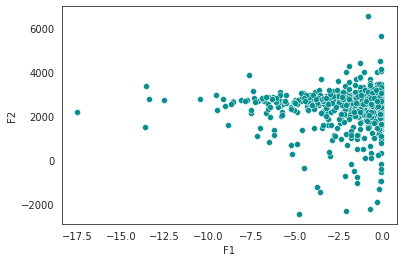

In [10]:
blue_green = ['#088F8F','#7393B3']
palette = sns.color_palette(blue_green)
sns.set_palette(palette)
sns.set_style("white")
sns.scatterplot(x='F1',y='F2',data=df);

In [11]:
input_features = df.drop(['Class'],axis=1)
output_features =df['Class']

In [12]:
input_features

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-0.123210,2577.3200,2183.52,7747.32,2.16,9693.21,-2.24980,-1381.98,3033.55,53.796,-90073.683,2.2986,6.7860,1,-3.9290,-0.8095,3.5800,-5.9384,-9.3420,1,24.93
1,-2.064600,1200.1200,1654.74,6027.72,2.16,9391.26,-2.74200,-1336.20,2081.35,33.514,-90039.942,0.9676,5.5240,0,-1.6609,-2.3020,3.8880,-6.5640,-6.3806,1,24.93
2,-0.083748,2769.3500,2661.42,7798.66,2.16,9296.28,-3.21300,-1531.16,3397.15,39.430,-90138.300,1.7296,10.0870,0,-2.5100,-2.8190,2.1606,-5.2340,-9.6780,0,24.93
3,-2.808300,3161.5200,2199.12,8369.32,5.16,7990.71,-2.27030,-1397.03,3289.99,42.012,-90993.330,3.5320,15.5400,1,-2.2555,-0.9770,8.2160,-5.8166,-6.1512,0,42.06
4,-0.445800,2707.4200,2083.62,9054.72,5.16,8691.81,-3.73100,-804.04,1903.35,43.172,-90092.340,0.5662,4.5188,0,-1.7843,-1.3690,0.7562,-6.4060,-9.5320,0,24.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637200,2575.9200,1493.97,7726.38,2.16,8822.31,-2.27120,-1052.44,2790.55,56.832,-90083.748,0.9634,5.8160,0,-2.0949,-1.9290,1.3156,-6.3420,-6.9018,1,32.58
996,-0.062512,2713.8200,1484.64,7529.12,2.16,9395.07,-2.43980,-1279.56,3143.73,49.938,-89349.330,1.1236,13.6120,1,-1.6278,-0.5306,0.7642,-6.1828,-8.1960,1,24.93
997,-0.458100,2827.8675,1539.30,7463.92,5.16,9285.81,-2.71500,-1503.12,3497.55,20.112,-90045.957,1.4140,5.0459,0,-1.8705,-2.7190,2.2880,-5.9302,-8.0580,1,33.81
998,-0.323700,2681.1200,2399.52,8268.92,2.16,10062.51,-2.79400,-1387.82,3001.85,32.880,-91178.430,2.6900,7.8240,1,-3.1360,-0.9401,4.0980,-5.7562,-12.4580,0,35.79


In [13]:
X = input_features
y = output_features
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)


In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 21) (200, 21) (800,) (200,)


In [15]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)



In [16]:
predictions = dt_clf.predict(X_test)

In [17]:
print(confusion_matrix(y_test,predictions))

[[84 19]
 [25 72]]


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.77      0.82      0.79       103
        True       0.79      0.74      0.77        97

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.78


In [20]:

rf_clf=RandomForestClassifier(n_estimators=20)
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)

In [21]:
print(confusion_matrix(y_test,predictions))

[[84 19]
 [25 72]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.77      0.82      0.79       103
        True       0.79      0.74      0.77        97

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.79


In [24]:

fig = KNeighborsClassifier(n_neighbors = 6)
fig.fit(X_train, y_train)
y_pred=fig.predict(X_test)


In [25]:
print(confusion_matrix(y_test,predictions))

[[84 19]
 [25 72]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.77      0.82      0.79       103
        True       0.79      0.74      0.77        97

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.655


### Part B

In [28]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
df.isnull().sum()
minvalue = df['F21'].min()
test_data.fillna(value =minvalue,inplace = True)
test_data.isnull().sum()



predicted =rf_clf.predict(test_data)# CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])

In [29]:
test_data.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
dtype: int64

In [30]:
minvalue = df['F21'].min()
test_data.fillna(value =minvalue,inplace = True)


In [31]:
test_data.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
dtype: int64